In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('merged_df.csv')
df

,Year,Month,Day,Temp,J-D,D-N,DJF,MAM,JJA,SON,...,CO2,CH4,N2O,CFC,HCFCs,HFCs,Total,CO2-eq,1990 = 1,change
0,1880,1,NaN,-0.19,-0.17,NaN,NaN,-0.12,-0.17,-0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1880,2,NaN,-0.25,-0.17,NaN,NaN,-0.12,-0.17,-0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1880,3,NaN,-0.09,-0.17,NaN,NaN,-0.12,-0.17,-0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1880,4,NaN,-0.17,-0.17,NaN,NaN,-0.12,-0.17,-0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1880,5,NaN,-0.10,-0.17,NaN,NaN,-0.12,-0.17,-0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27589,2023,8,NaN,NaN,NaN,NaN,0.88,1.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27590,2023,9,NaN,NaN,NaN,NaN,0.88,1.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27591,2023,10,NaN,NaN,NaN,NaN,0.88,1.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27592,2023,11,NaN,NaN,NaN,NaN,0.88,1.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# 1979 ~ 2019년까지의 데이터 출력
df = df[(df.Year >= 1979) & (df.Year <=2019)]

# 연도에 따른 지구 표면 평균 온도의 최댓값, 최솟값 출력
df.groupby(['Year']).Temp.agg(['max', 'min'])

# 모든 연도에 대해서 오존 구멍 면적의 최댓값, 최솟값, 값에 해당하는 연도 출력
max_ozone_hole = df['Hole Area'].max()
min_ozone_hole = df['Hole Area'].min()
df.Year[df['Hole Area'] == max_ozone_hole].drop_duplicates()
df.Year[df['Hole Area'] == min_ozone_hole].drop_duplicates()

# 8월 데이터들에서 연도, 월, 반구 기준으로 그룹화하고 북극, 남극 빙하 면적의 최댓값, 최솟값 출력
aug_data = df[df['Month'] == 8]
aug_data.groupby(['Year', 'Month', 'hemisphere']).Extent.agg(['max', 'min'])

# 연도에 따른 빙하 면적의 평균값 출력
df.groupby(['Year', 'hemisphere']).Extent.agg(['mean'])

mean
Year hemisphere           
1979 north       12.319560
     south       11.719137
1980 north       12.334148
     south       11.236290
1981 north       12.135486
...                    ...
2017 south       10.748926
2018 north       10.326964
     south       10.937660
2019 north       13.610510
     south        4.876781

[82 rows x 1 columns]

In [95]:
# 연간 Temp열의 온도와 CO2열의 농도간 상관관계를 분석해보자

df = pd.read_csv('merged_df.csv')

df = df[['Year', 'Temp', 'CO2']].dropna() # Temp, CO2 열의 결측값 제거

annual_data = df.groupby('Year').mean().reset_index() # 연간 평균 표면 온도, 이산화탄소 농도, year를 다시 열로 리셋 인덱스
correlation = annual_data[['Temp', 'CO2']].corr() # 두 변수 간 상관계수 계산

annual_data
correlation # 지구 표면 온도와 이산화탄소 농도는 매우 높은 '양의 상관관계'임을 알 수 있다.

,Temp,CO2
Temp,1.000000,0.941808
CO2,0.941808,1.000000


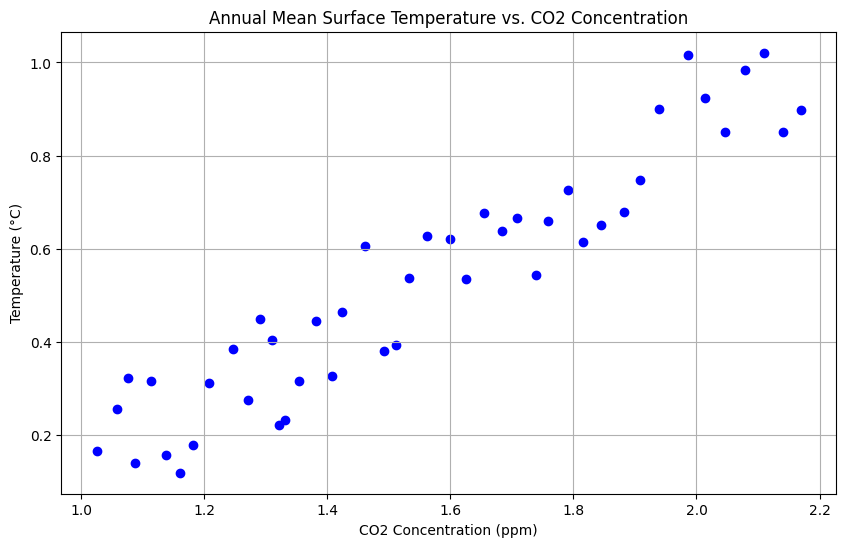

In [96]:
# 산점도(Scatter plot)를 사용하여 연간 평균 지구 표면 온도와 이산화탄소 농도 간의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(annual_data['CO2'], annual_data['Temp'], color='blue')
plt.title('Annual Mean Surface Temperature vs. CO2 Concentration')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [97]:
# 연간 오존층 파괴 주요 물질과 오존 구멍 면적 간 상관관계를 분석해보자

df = pd.read_csv('merged_df.csv')

columns_of_interest = ['Year', 'Hole Area', 'CFC', 'HCFCs', 'HFCs'] # 관련 열 선택
df = df[columns_of_interest].dropna() # 결측값 제거

annual_data = df.groupby('Year').mean().reset_index() # 연간 평균 계산
correlation_matrix = annual_data.corr() # 상관계수 계산

annual_data
correlation_matrix

# 오존 구멍 면적과의 관계
# 1. 염화불화탄소(CFC): 강한 양의 상관관계, 물질의 농도가 증가할 수록 오존 구멍의 면적도 증가한다.
# 2. 하이드로클로로플루오로카본(HCFCs): 중간정도의 양의 상관관계, CFC에 비해 오존 구멍의 면적 증가량이 적다.
# 3. 하이드로플루오로카본(HFCs): 약한 양의 상관관계, 오존 구멍에 미치는 영향이 대체로 적다.

# 또한 시간에 따라 HCFCs와 HFCs의 농도가 강하게 증가하는 추세이다.

,Year,Hole Area,CFC,HCFCs,HFCs
Year,1.000000,0.595312,0.558528,0.996530,0.938951
Hole Area,0.595312,1.000000,0.870670,0.564321,0.357356
CFC,0.558528,0.870670,1.000000,0.524222,0.264909
HCFCs,0.996530,0.564321,0.524222,1.000000,0.939969
HFCs,0.938951,0.357356,0.264909,0.939969,1.000000


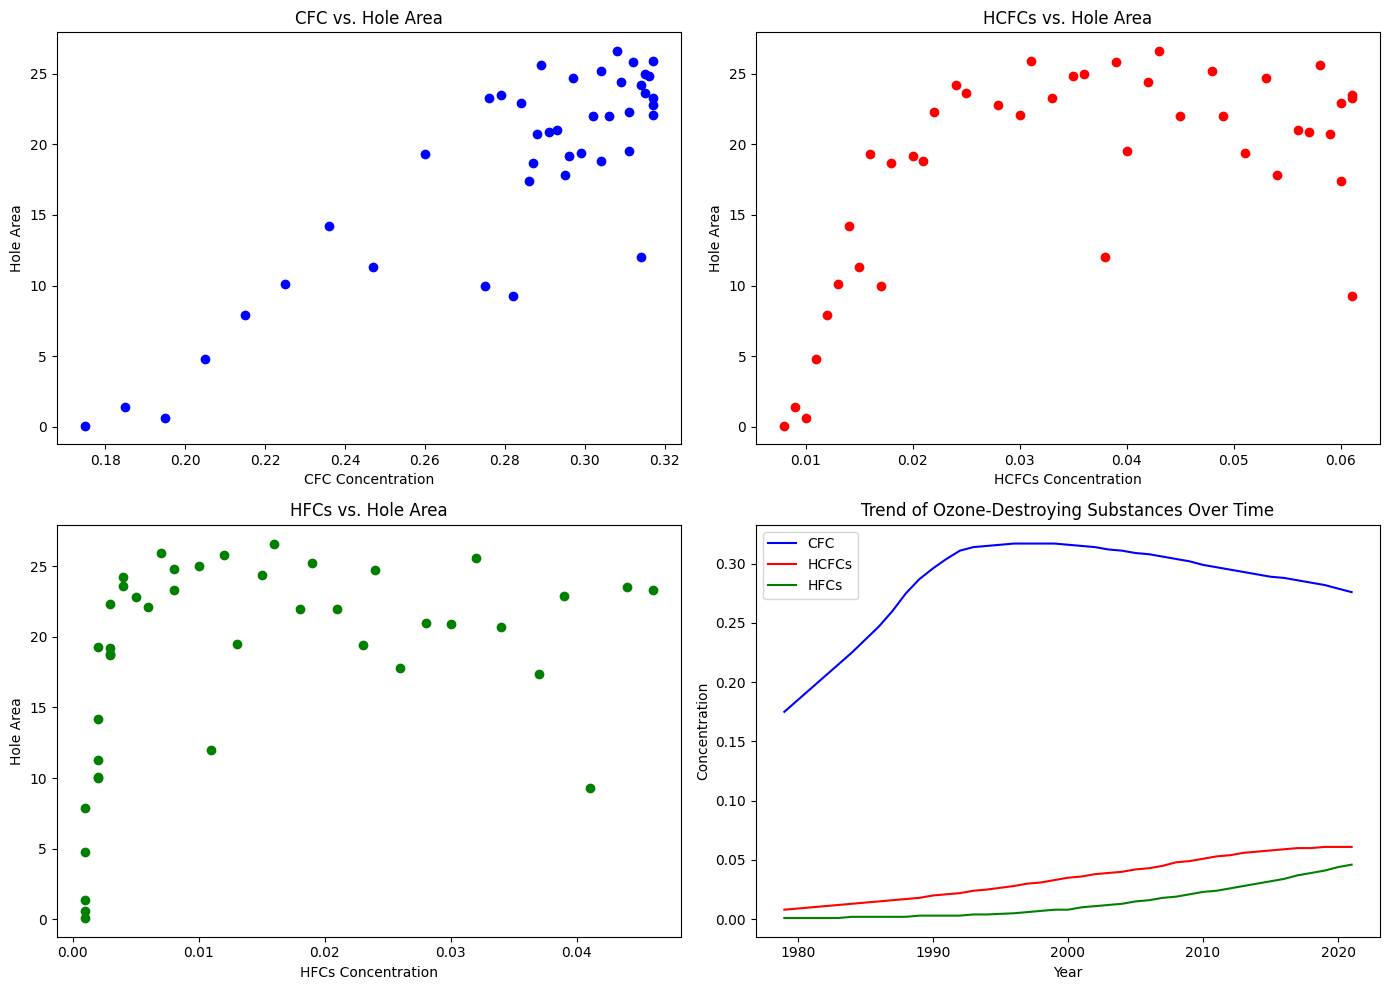

In [98]:
# 산점도를 사용하여 오존 구멍 면적과 오존 파괴 주요 물질 간의 관계 시각화
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.scatter(annual_data['CFC'], annual_data['Hole Area'], color='blue')
plt.title('CFC vs. Hole Area')
plt.xlabel('CFC Concentration')
plt.ylabel('Hole Area')

plt.subplot(2, 2, 2)
plt.scatter(annual_data['HCFCs'], annual_data['Hole Area'], color='red')
plt.title('HCFCs vs. Hole Area')
plt.xlabel('HCFCs Concentration')
plt.ylabel('Hole Area')

plt.subplot(2, 2, 3)
plt.scatter(annual_data['HFCs'], annual_data['Hole Area'], color='green')
plt.title('HFCs vs. Hole Area')
plt.xlabel('HFCs Concentration')
plt.ylabel('Hole Area')

# 시간에 따른 물질 농도의 변화를 시각화 (시계열 그래프)
plt.subplot(2, 2, 4)
plt.plot(annual_data['Year'], annual_data['CFC'], label='CFC', color='blue')
plt.plot(annual_data['Year'], annual_data['HCFCs'], label='HCFCs', color='red')
plt.plot(annual_data['Year'], annual_data['HFCs'], label='HFCs', color='green')
plt.title('Trend of Ozone-Destroying Substances Over Time')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend()

plt.tight_layout()
plt.show()

In [99]:
# 연간 주요 온실가스 농도와 북극 빙하 면적 간 상관관계를 분석해보자

df = pd.read_csv('merged_df.csv')

north_data = df[df['hemisphere'] == 'north'] # 북반구 데이터
columns_of_interest = ['Year', 'CO2', 'Extent'] # 관련 열 선택
df_selected = north_data[columns_of_interest].dropna() # 결측값 제거

annual_data = df_selected.groupby('Year').mean().reset_index() # 연간 평균 계산
correlation_matrix = annual_data.corr() # 상관계수 계산

annual_data
correlation_matrix # CO2와 Extent는 음의 상관관계, 시간이 지남에 따라 이산화탄소 농도가 증가하고 빙하 면적은 감소하는 추세이다.

,Year,CO2,Extent
Year,1.000000,0.997296,-0.676163
CO2,0.997296,1.000000,-0.665495
Extent,-0.676163,-0.665495,1.000000


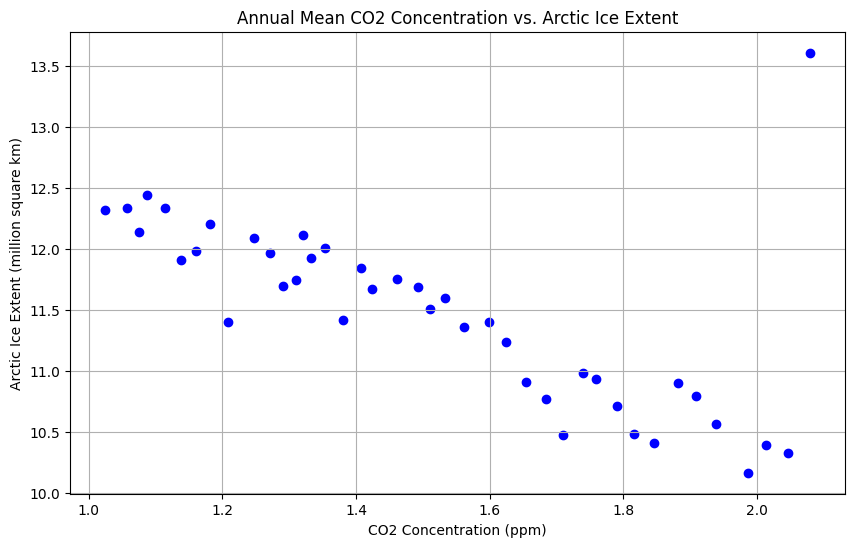

In [100]:
# 산점도를 사용하여 주요 온실 가스 농도와 북극 빙하 면적 간의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(annual_data['CO2'], annual_data['Extent'], color='blue')
plt.title('Annual Mean CO2 Concentration vs. Arctic Ice Extent')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Arctic Ice Extent (million square km)')
plt.grid(True)
plt.show()

In [101]:
# 연간 오존 구멍 면적과 북극 빙하 면적 간 상관관계를 분석해보자.

df = pd.read_csv('merged_df.csv')

north_data = df[df['hemisphere'] == 'north'] # 북반구 데이터
columns_of_interest = ['Year', 'Hole Area', 'Extent'] # 관련 열 선택
df_selected = north_data[columns_of_interest].dropna() # 결측값 제거

annual_data = df_selected.groupby('Year').mean().reset_index() # 연간 평균 계산
correlation_matrix = annual_data.corr() # 상관계수 계산

annual_data
correlation_matrix # 오존 구멍과 빙하 면적은 음의 상관관계, 오존 구멍이 증가할 수록 빙하 면적이 감소하는 경향을 보인다.

,Year,Hole Area,Extent
Year,1.00000,0.586790,-0.677890
Hole Area,0.58679,1.000000,-0.572604
Extent,-0.67789,-0.572604,1.000000


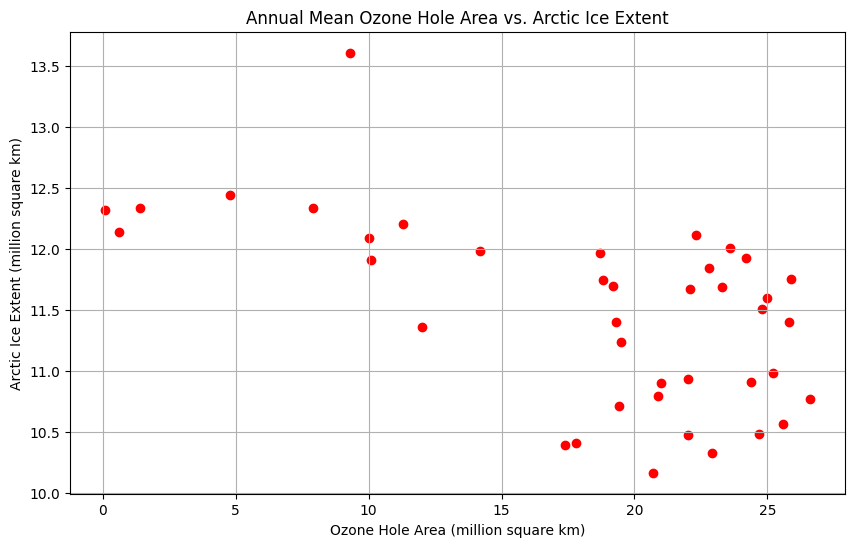

In [102]:
# 산점도를 사용하여 오존 구멍 면적과 북극 빙하 면적 간의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(annual_data['Hole Area'], annual_data['Extent'], color='red')
plt.title('Annual Mean Ozone Hole Area vs. Arctic Ice Extent')
plt.xlabel('Ozone Hole Area (million square km)')
plt.ylabel('Arctic Ice Extent (million square km)')
plt.grid(True)
plt.show()